In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from random import randint
colors = plt.cm.tab20(np.linspace(0, 1, 13))

path_name = "C:\\Users\\friso\\BEP\\Raw_data\\cv\\data\\"

def split_list(lst, chunk_size):
    chunks = [[] for _ in range((len(lst) + chunk_size - 1) // chunk_size)]
    for i, item in enumerate(lst):
        chunks[i // chunk_size].append(item)
    return chunks

In [22]:
folder_names = [item for item in os.listdir(path_name) if os.path.isdir(os.path.join(path_name, item))]
experiment_numbers = [int(name.split("_")[-1]) for name in folder_names]
folder_names = [name for _, name in sorted(zip(experiment_numbers, folder_names))]


data_compression = folder_names[:48]
data_compression = split_list(data_compression, 12)

data_shear = folder_names[48:]
data_shear = split_list(data_shear, 12)


dict_compression = {}
dict_compression['R_cell = 2.5'] = data_compression[0]
dict_compression['R_cell = 3.0'] = data_compression[1]
dict_compression['R_cell = 4.0'] = data_compression[2]
dict_compression['R_cell = 5.0'] = data_compression[3]

dict_shear = {}
dict_shear['R_cell = 2.5'] = data_shear[0]
dict_shear['R_cell = 3.0'] = data_shear[1]
dict_shear['R_cell = 4.0'] = data_shear[2]
dict_shear['R_cell = 5.0'] = data_shear[3]

print(dict_shear['R_cell = 5.0'])

C_M = [1, 5, 10, 15, 20, 25, 30, 35, 38, 40, 45, 50]

['2024-06-07_21-34-29_job_3818118_85', '2024-06-07_21-34-29_job_3818118_86', '2024-06-07_21-34-29_job_3818118_87', '2024-06-07_21-34-28_job_3818118_88', '2024-06-07_21-34-27_job_3818118_89', '2024-06-07_21-34-28_job_3818118_90', '2024-06-07_21-34-28_job_3818118_91', '2024-06-07_21-34-28_job_3818118_92', '2024-06-07_21-34-28_job_3818118_93', '2024-06-07_21-34-28_job_3818118_94', '2024-06-07_21-34-28_job_3818118_95', '2024-06-07_21-34-28_job_3818118_96']


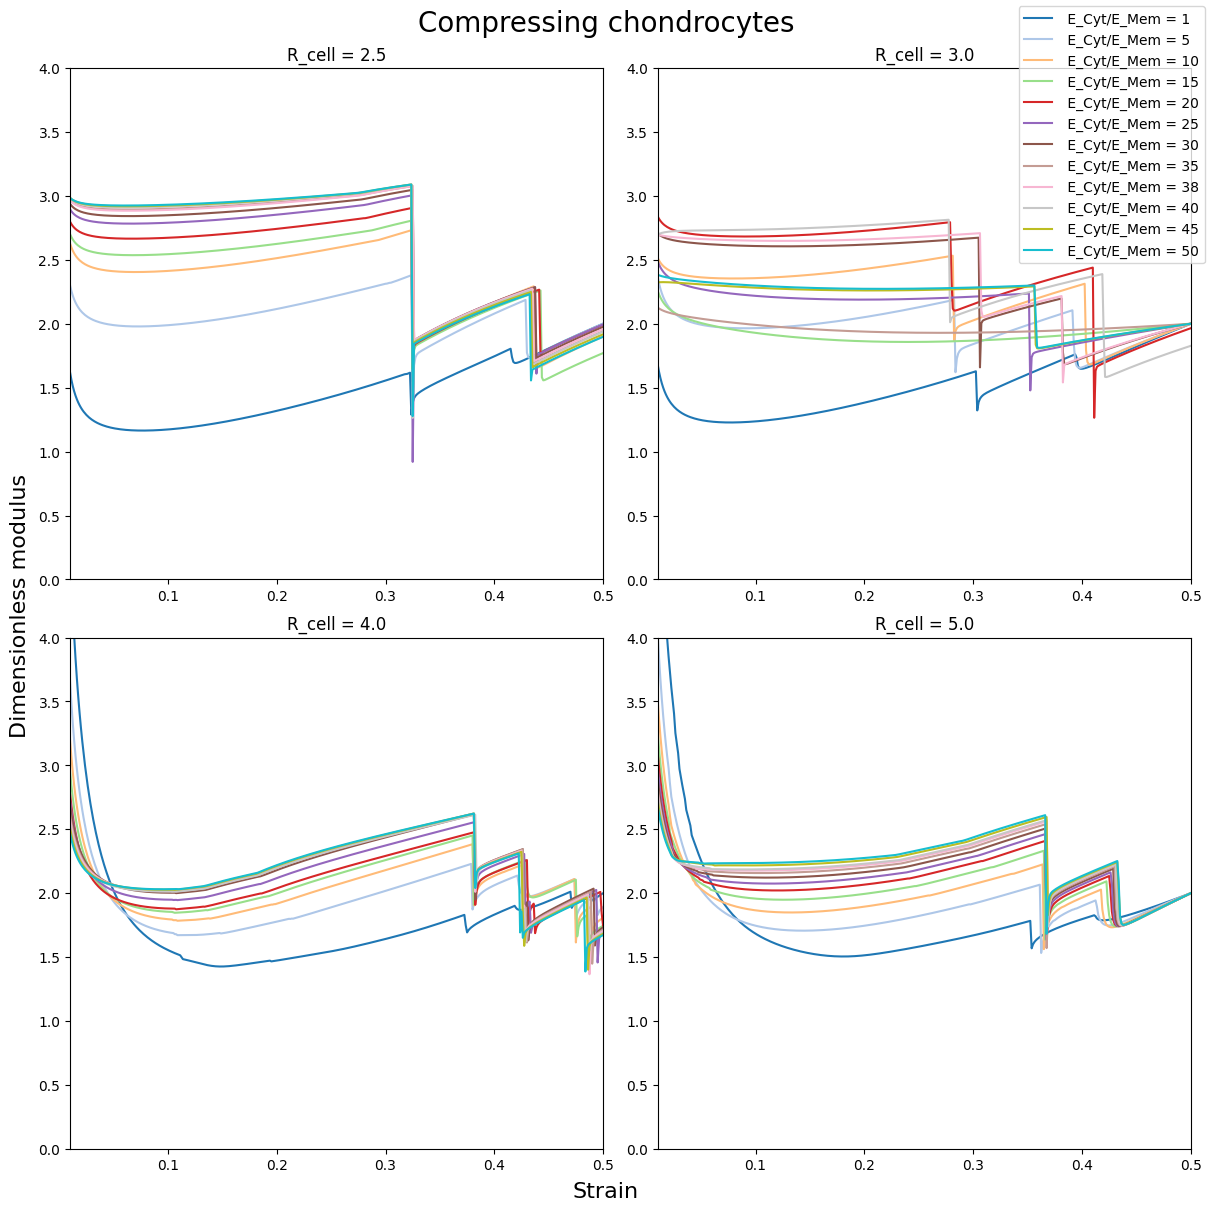

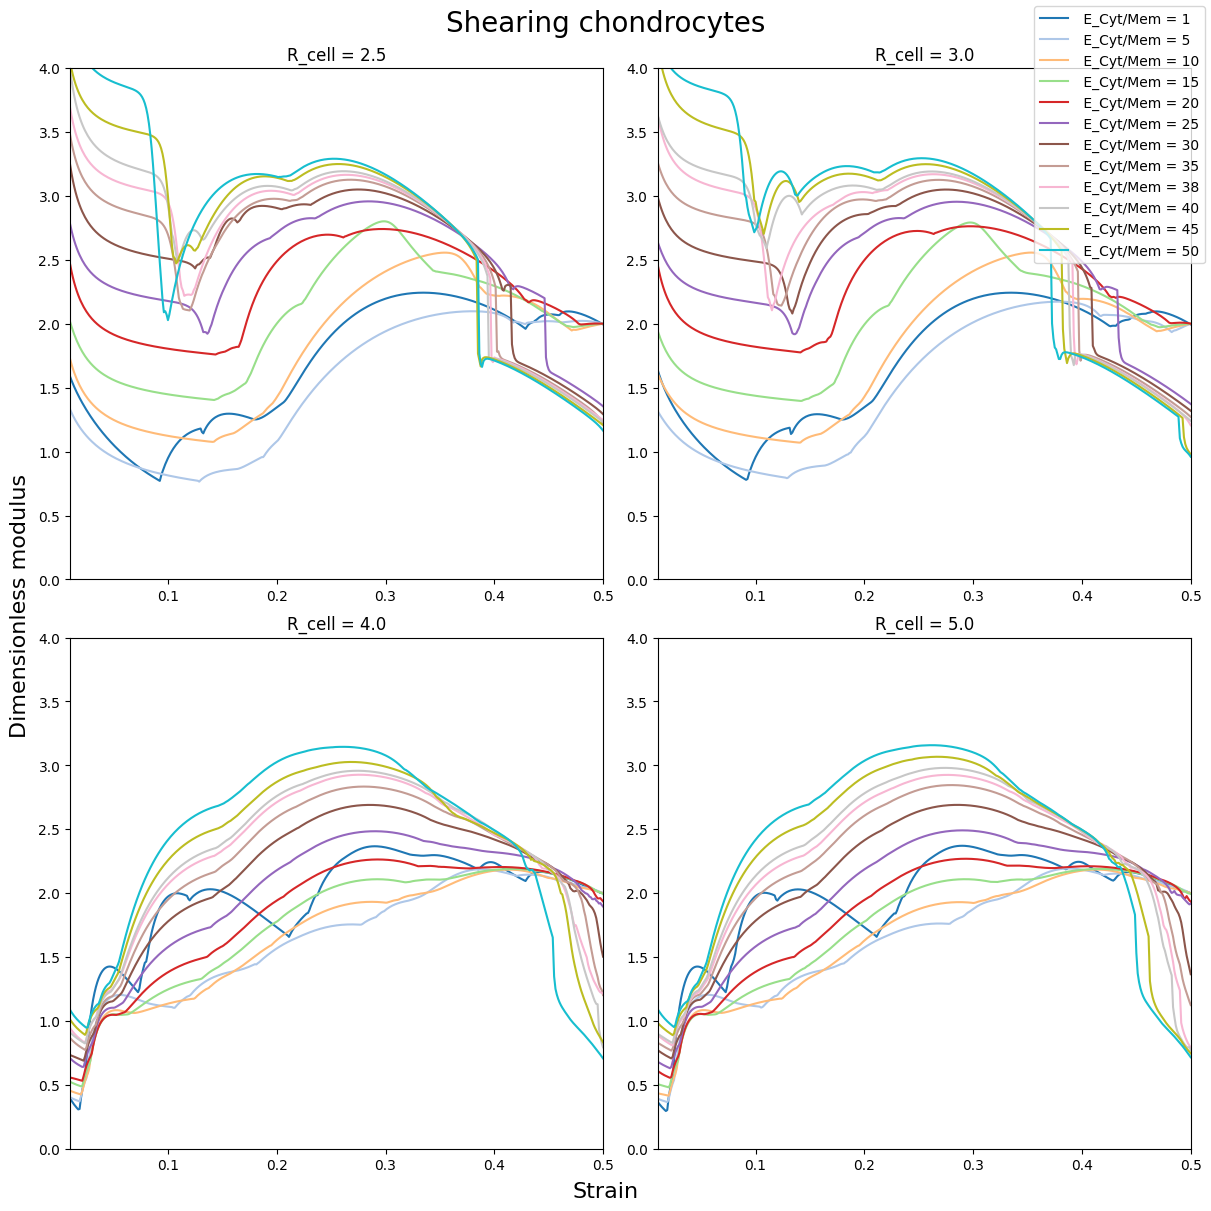

In [23]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 12), layout="constrained")
fig.suptitle('Compressing chondrocytes', fontsize=20)

for key in dict_compression:
    if key == 'R_cell = 2.5':
        row, col = 0, 0   
        axs[row, col].title.set_text(key) 
    if key == 'R_cell = 3.0':
        row, col = 0, 1  
        axs[row, col].title.set_text(key) 
    if key == 'R_cell = 4.0':
        row, col = 1, 0  
        axs[row, col].title.set_text(key) 
    if key == 'R_cell = 5.0':
        row, col = 1, 1
        axs[row, col].title.set_text(key) 

    for index, run in enumerate(dict_compression[key]):
        experiment = (path_name + run + "\\Stress_strain").replace('\\', '/')
        pre_df = pd.read_csv(experiment)
        pre_df = pre_df.replace('-nan(ind)', '0.0000')  

        axs[row, col].plot(pre_df["Strain"], (pre_df["Stress"] / np.max([stress for stress in pre_df["Stress"]]) / pre_df["Strain"]), label = f" E_Cyt/E_Mem = {C_M[index]}", c = colors[index])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys())#, loc='center left')#, ncol=1, bbox_to_anchor=(1.0, 0.5))
fig.supxlabel('Strain', fontsize=16)
plt.setp(axs, ylim=(0, 4))
plt.setp(axs, xlim=(0.01, 0.5))
fig.supylabel('Dimensionless modulus', fontsize=16)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 12), layout="constrained")
fig.suptitle('Shearing chondrocytes', fontsize=20)
# add an artist, in this case a nice label in the middle...

for key in dict_shear:
    if key == 'R_cell = 2.5':
        row, col = 0, 0 
        axs[row, col].title.set_text(key)  
    if key == 'R_cell = 3.0':
        row, col = 0, 1  
        axs[row, col].title.set_text(key) 
    if key == 'R_cell = 4.0':
        row, col = 1, 0  
        axs[row, col].title.set_text(key) 
    if key == 'R_cell = 5.0':
        row, col = 1, 1
        axs[row, col].title.set_text(key) 

    for index, run in enumerate(dict_shear[key]):
        experiment = (path_name + run + "\\Stress_strain").replace('\\', '/')
        pre_df = pd.read_csv(experiment)
        pre_df = pre_df.replace('-nan(ind)', '0.0000')  

        axs[row, col].plot(pre_df["Strain"] , (pre_df["Stress"] / np.max([stress for stress in pre_df["Stress"]])) / pre_df["Strain"], label = f" E_Cyt/Mem = {C_M[index]}", c = colors[index])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys())#, loc='center left')#, ncol=1, bbox_to_anchor=(1.0, 0.5))
fig.supxlabel('Strain', fontsize=16)
plt.setp(axs, ylim=(0, 4))
plt.setp(axs, xlim=(0.01, 0.5))
fig.supylabel('Dimensionless modulus', fontsize=16)
plt.show()

In [24]:
path_name = "C:\\Users\\friso\\BEP\\Raw_data\\cv\\data\\"

folder_names = [item for item in os.listdir(path_name) if os.path.isdir(os.path.join(path_name, item))]
experiment_numbers = [int(name.split("_")[-1]) for name in folder_names]
folder_names = [name for _, name in sorted(zip(experiment_numbers, folder_names))]


data_compression = folder_names[:32]
data_compression = split_list(data_compression, 8)

data_shear = folder_names[32:]
data_shear = split_list(data_shear, 8)


dict_compression = {}
dict_compression['R_cell = 2.5'] = data_compression[0]
dict_compression['R_cell = 3.0'] = data_compression[1]
dict_compression['R_cell = 4.0'] = data_compression[2]
dict_compression['R_cell = 5.0'] = data_compression[3]

dict_shear = {}
dict_shear['R_cell = 2.5'] = data_shear[0]
dict_shear['R_cell = 3.0'] = data_shear[1]
dict_shear['R_cell = 4.0'] = data_shear[2]
dict_shear['R_cell = 5.0'] = data_shear[3]

print(dict_shear['R_cell = 5.0'])

C_M = [1, 2, 3, 4, 5, 6, 7, 10]

['2024-06-07_21-34-29_job_3818118_57', '2024-06-07_21-34-28_job_3818118_58', '2024-06-07_21-34-27_job_3818118_59', '2024-06-07_21-34-29_job_3818118_60', '2024-06-07_21-34-29_job_3818118_61', '2024-06-07_21-34-28_job_3818118_62', '2024-06-07_21-34-28_job_3818118_63', '2024-06-07_21-34-28_job_3818118_64']


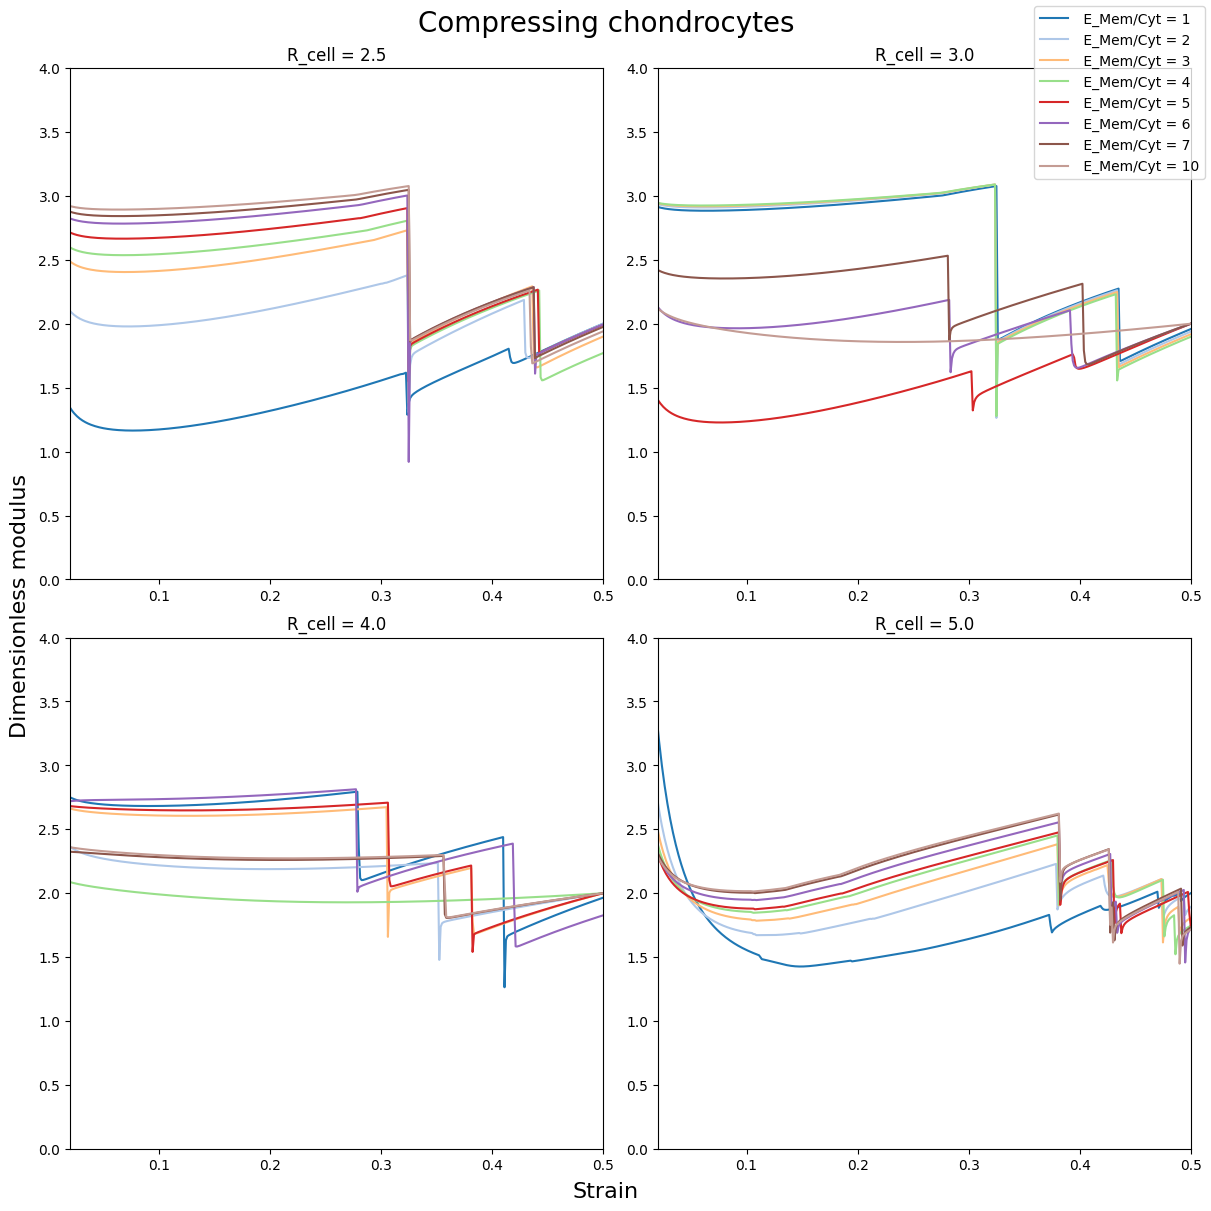

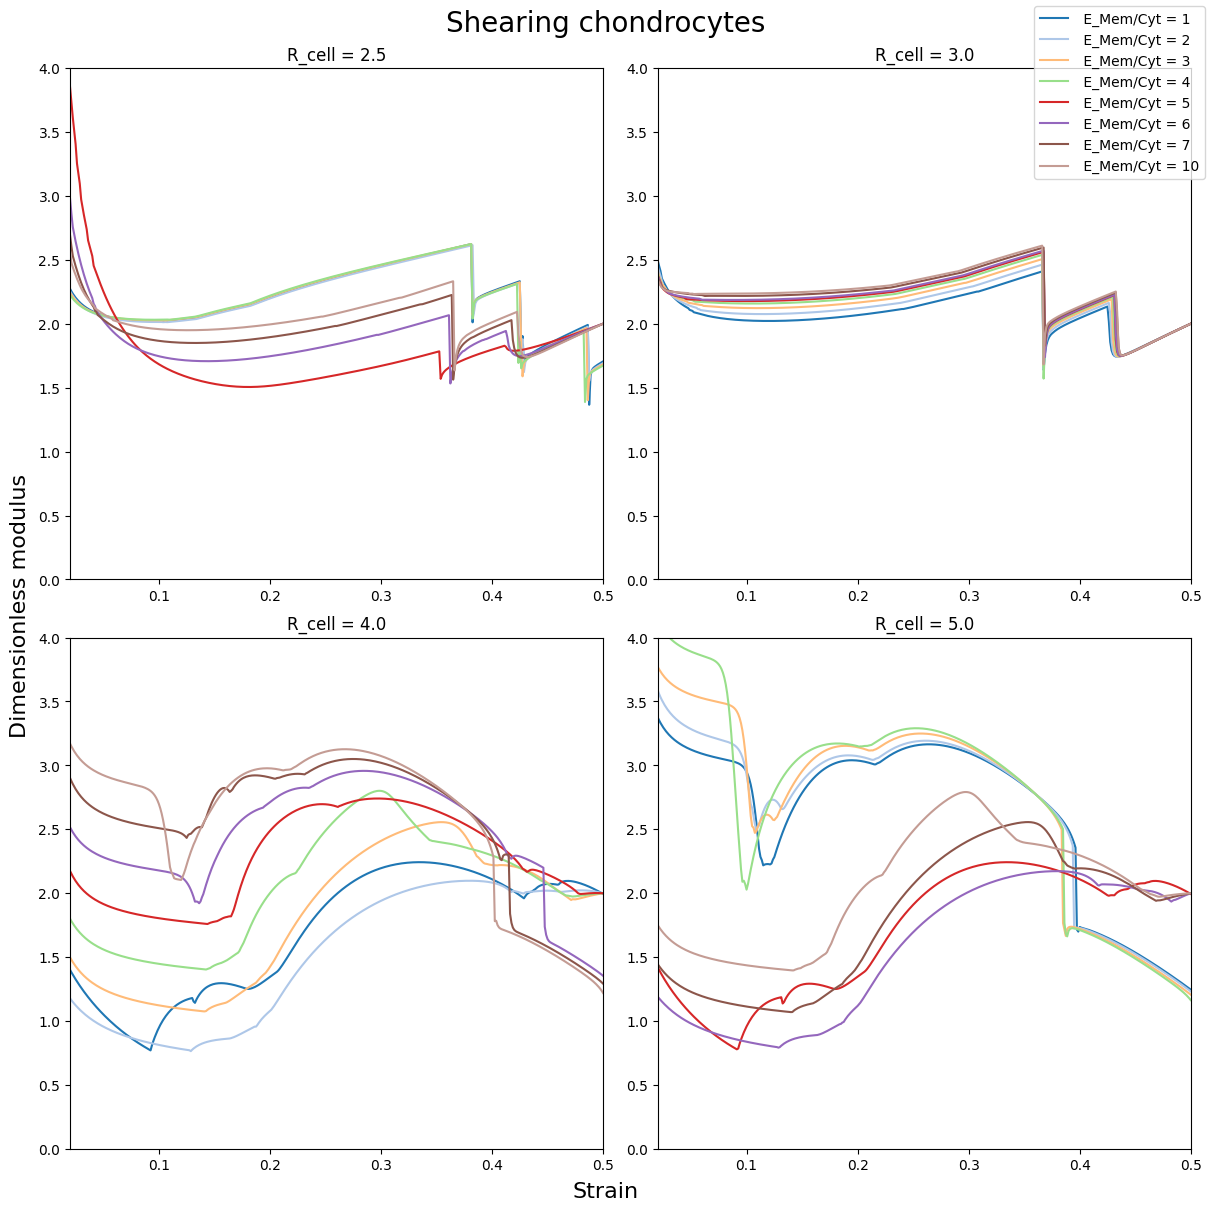

In [25]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 12), layout="constrained")
fig.suptitle('Compressing chondrocytes', fontsize=20)

for key in dict_compression:
    if key == 'R_cell = 2.5':
        row, col = 0, 0   
        axs[row, col].title.set_text(key) 
    if key == 'R_cell = 3.0':
        row, col = 0, 1  
        axs[row, col].title.set_text(key) 
    if key == 'R_cell = 4.0':
        row, col = 1, 0  
        axs[row, col].title.set_text(key) 
    if key == 'R_cell = 5.0':
        row, col = 1, 1
        axs[row, col].title.set_text(key) 

    for index, run in enumerate(dict_compression[key]):
        experiment = (path_name + run + "\\Stress_strain").replace('\\', '/')
        pre_df = pd.read_csv(experiment)
        pre_df = pre_df.replace('-nan(ind)', '0.0000')  

        axs[row, col].plot(pre_df["Strain"] , (pre_df["Stress"] / np.max([stress for stress in pre_df["Stress"]])) / pre_df["Strain"], label = f" E_Mem/Cyt = {C_M[index]}", c = colors[index])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys())#, loc='center left', ncol=1, bbox_to_anchor=(1.0, 0.5))
fig.supxlabel('Strain', fontsize=16)
plt.setp(axs, ylim=(0, 4))
plt.setp(axs, xlim=(0.02, 0.5))
fig.supylabel('Dimensionless modulus', fontsize=16)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 12), layout="constrained")
fig.suptitle('Shearing chondrocytes', fontsize=20)
# add an artist, in this case a nice label in the middle...

for key in dict_shear:
    if key == 'R_cell = 2.5':
        row, col = 0, 0 
        axs[row, col].title.set_text(key)  
    if key == 'R_cell = 3.0':
        row, col = 0, 1  
        axs[row, col].title.set_text(key) 
    if key == 'R_cell = 4.0':
        row, col = 1, 0  
        axs[row, col].title.set_text(key) 
    if key == 'R_cell = 5.0':
        row, col = 1, 1
        axs[row, col].title.set_text(key) 

    for index, run in enumerate(dict_shear[key]):
        experiment = (path_name + run + "\\Stress_strain").replace('\\', '/')
        pre_df = pd.read_csv(experiment)
        pre_df = pre_df.replace('-nan(ind)', '0.0000')  

        axs[row, col].plot(pre_df["Strain"] , (pre_df["Stress"] / np.max([stress for stress in pre_df["Stress"]])) / pre_df["Strain"], label = f" E_Mem/Cyt = {C_M[index]}", c = colors[index])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys())#, loc='center left')#, ncol=1, bbox_to_anchor=(1.0, 0.5))
fig.supxlabel('Strain', fontsize=16)
plt.setp(axs, ylim=(0, 4))
plt.setp(axs, xlim=(0.02, 0.5))
fig.supylabel('Dimensionless modulus', fontsize=16)
plt.show()